In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout,Activation
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
sand = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
# slp= 'https://raw.githubusercontent.com/loguansiang/fyp/main/SLP%20fyp.csv'
# mana = 'https://raw.githubusercontent.com/loguansiang/fyp/main/MANA%20fyp.csv'

df = pd.read_csv(sand)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [ ]:
df

In [ ]:
pip install ta

In [ ]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [ ]:
df['Pre_Close'] = df['Close'].shift(+1)
df[('H-L')] = df['High'] - df['Low']
df[('0-C')]= df['Open'] - df['Close']
df['SMA_7'] = df.Close.rolling(7, min_periods=1).mean()
df['rsi_7']=ta.momentum.rsi(df.Close,window=7)
#df['MACD'] = ta.trend.macd_diff(df.Close)
df['EMA_7']= df['Close'].ewm(span=7).mean()
df = df.drop(columns=['Adj Close'])
df.dropna(inplace= True)
df

In [ ]:
def data_prep(dataset, target, data_start, data_end, look_back, horizon):
    dataX,dataY = [],[]
    data_start = data_start + look_back
    if data_end is None:
        data_end = len(dataset) - horizon

    for i in range(data_start, data_end):
        a = range(i-look_back, i)
        dataX.append(dataset[a])

        b = range(i+1, i+1+horizon)
        dataY.append(target[b])
    return np.array(dataX), np.array(dataY)

In [ ]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
# X_data = X_scaler.fit_transform(df[['Open', 'High', 'Low','Volume','H-L',	'0-C','SMA_7','rsi_7','EMA_7']])//experiment4
X_data = X_scaler.fit_transform(df[['rsi_7','EMA_7']])
Y_data = Y_scaler.fit_transform(df[['Close']])

##['Open', 'High', 'Low','Volume']
##['H-L',	'0-C','SMA_7','rsi_7','EMA_7']

In [ ]:
##TRAIN_SPLIT = int(len(df) * 0.8)
look_back = 10
horizon = 10
train_split = int(len(df) * 0.8)
x_train, y_train = data_prep(X_data, Y_data, 0, train_split, look_back, horizon)
x_vali, y_vali = data_prep(X_data, Y_data, train_split, None, look_back, horizon)

In [ ]:
# x_train

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [ ]:
batch_size = 32

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# from keras.layers.merge import concatenate
import tensorflow as tf

In [ ]:
x_train.shape[-2:]

In [ ]:
#define model
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers

# Set the learning rate
#0.0001,0.001,0.01,0.1,1
learning_rate = 0.001
l1_rate=regularizers.l1(0.005)
# Create the optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Set random seed for as reproducible results as possible
tf.random.set_seed(7)
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x_train.shape[-2:]),activity_regularizer= l1_rate))
cnn_model.add(Conv1D(filters=64, kernel_size=1,activity_regularizer= l1_rate))
cnn_model.add(MaxPooling1D(pool_size=(1)))
cnn_model.add(Conv1D(filters=128, kernel_size=1,activity_regularizer= l1_rate))
cnn_model.add(Flatten())
cnn_model.add(Dense(256,activity_regularizer= l1_rate))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10))
# Compile the model with the optimizer
cnn_model.compile(optimizer=optimizer, loss='mse')
cnn_model.summary()



In [ ]:

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
# tf.random.set_seed(7)

# lstm_model = Sequential()
# lstm_model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[-2:])))
# lstm_model.add(Dense(20,activation='linear'))
# lstm_model.add(LSTM(50))
# lstm_model.add(Dropout(0.2))
# lstm_model.add(Dense(units=horizon,activation='linear'))
# lstm_model.compile(loss='mean_squared_error', optimizer='adam')
# lstm_model.summary()


In [94]:
history = cnn_model.fit(train_data,epochs=50,batch_size=32,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)


Epoch 1/50
100/100 [==============================] - 2s 11ms/step - loss: 0.2383 - val_loss: 0.3270
Epoch 2/50
100/100 [==============================] - 1s 10ms/step - loss: 0.1145 - val_loss: 0.2257
Epoch 3/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0809 - val_loss: 0.1769
Epoch 4/50
100/100 [==============================] - 1s 9ms/step - loss: 0.0603 - val_loss: 0.1493
Epoch 5/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0294 - val_loss: 0.1411
Epoch 6/50
100/100 [==============================] - 1s 9ms/step - loss: 0.0250 - val_loss: 0.1270
Epoch 7/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0236 - val_loss: 0.1286
Epoch 8/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0301 - val_loss: 0.1122
Epoch 9/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0234 - val_loss: 0.1029
Epoch 10/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0211 - val_loss

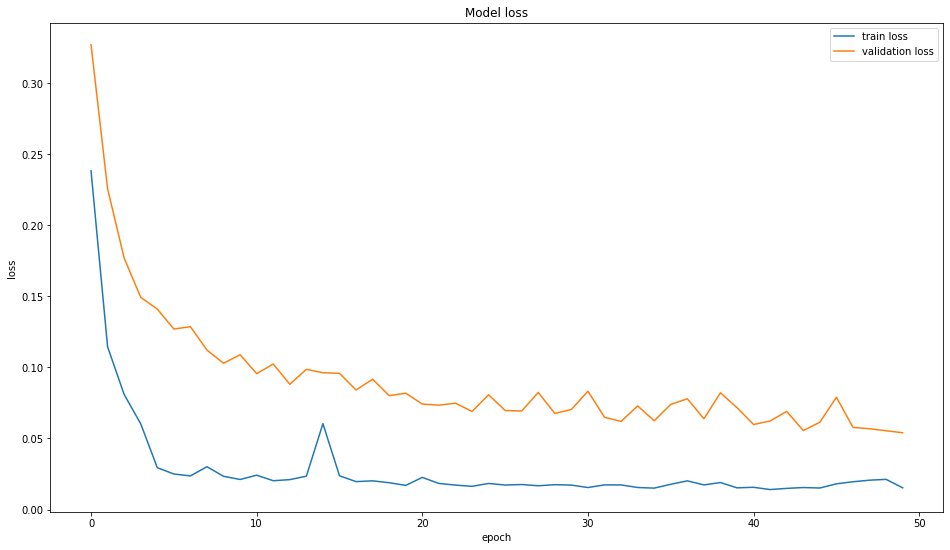

In [95]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [96]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Pre_Close', 'H-L', '0-C',
       'SMA_7', 'rsi_7', 'EMA_7'],
      dtype='object')

In [97]:

##['open']


data_val = X_scaler.fit_transform(df[['rsi_7','EMA_7']].tail(10))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred=cnn_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

1/1 [==============================] - 0s 120ms/step


array([[1.3141022, 1.3137981, 1.3207971, 1.3606098, 1.3064618, 1.3569771,
        1.4088563, 1.5016928, 1.5043895, 1.5847895]], dtype=float32)

In [98]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')


In [99]:
validate = (df[['Close']].tail(10))
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 2.0801325320174886
MAE is : 1.4346415901794434
RMSE is : 1.4422664566637777
MAPE is : 50.581191661496874


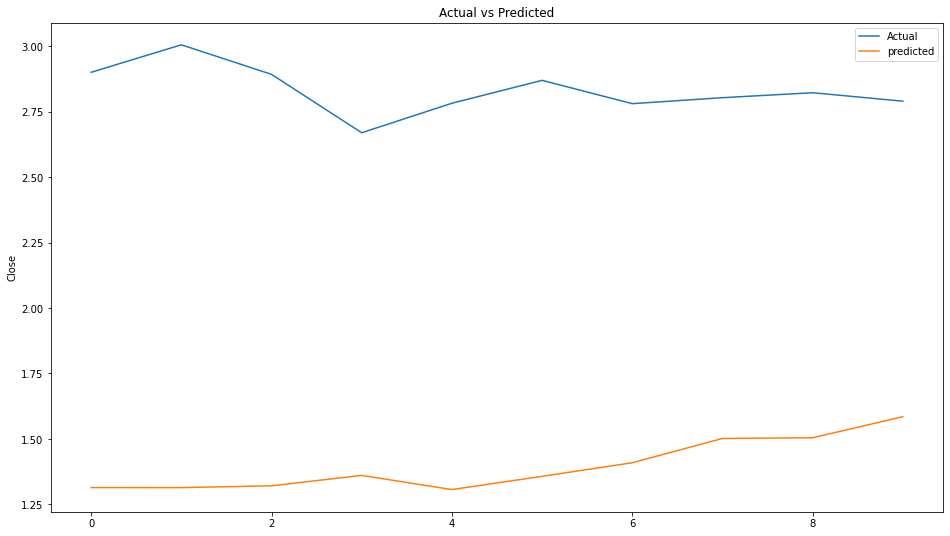

In [100]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()